In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [14]:
dfx = pd.read_csv('logisticX.csv')
dfy = pd.read_csv('logisticY.csv')
#dfx.head(n=10)


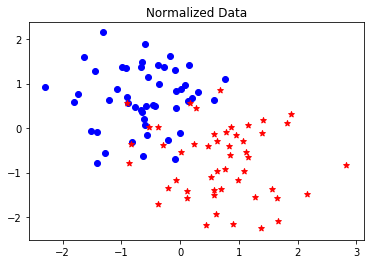

In [15]:
x_values = dfx.values 
classes = dfy.values

#Normalisation of the Data
mean = x_values.mean()
std_deviation = x_values.std()
x_values -= mean
x_values /= std_deviation

no_of_samples = x_values.shape[0]

#Initial Plot   
plt.title("Normalized Data")
for i in range(no_of_samples):
    if classes[i][0]==1:
        plt.scatter(x_values[i][0],x_values[i][1],c='red',marker='*')
    else:
        plt.scatter(x_values[i][0],x_values[i][1],c='blue')
        
  
        
plt.show()

In [20]:
#define the logistic/sigmoid function
def g(z):
    denom = 1 + np.exp(-1*z)
    return 1.0/denom


def getHypothesis(theta_values,x_values):
    z = 0
    z = np.dot(x_values,theta_values)
    return g(z)

"""Log Likelihood => Maximimize the Log Likelihood Cost here
LL(theta) = yi*log(hxi) + (1-yi)log(1-hxi)"""

def getLikelihood(x_input,theta_values,y_labels):
    no_of_samples =  x_values.shape[0]
    cost = 0.0
    
    for i in range(no_of_samples):
        hxi = getHypothesis(theta_values,x_input[i])
        
        cost += y_labels[i][0]*(np.log(hxi))
        cost += (1-y_labels[i][0])*(np.log(1-hxi))
        
        
    return cost

"""Gradient [y -h(x)]xj"""
def getGradient(x_input,theta_values,y_label):
    return np.dot(x_input.T,(y_label - g(np.dot(x_input,theta_values))))


def getLogisticHessian(x,theta_values):
    hx = getHypothesis(theta_values,x)    
    Hessian = np.dot(x.T,-1*hx*(1-hx)*x)
    return Hessian
    
    
def newtonsMethod(x_values,y_values,max_epochs=1000,tolerance=0.01):
    theta_values = np.zeros((3,1))
    
    
    ones = np.ones((x_values.shape[0],1))
    x = np.hstack((x_values,ones))
   
    llhoodCosts = []
    converged = False
    epoch = 0
    cost = getLikelihood(x,theta_values,y_values)
    
    while(epoch<=max_epochs and not converged):
        grad = getGradient(x,theta_values,y_values)
        H = getLogisticHessian(x,theta_values)
        
        theta_values = theta_values - 0.01*np.dot(np.linalg.pinv(H),grad)
        
        new_cost = getLikelihood(x,theta_values,y_values)
        
        if(new_cost-cost<=tolerance):
            converged=True
        cost = new_cost
            
        llhoodCosts.append(new_cost)
        epoch +=1
        
    print("Newton's Method converged after "+str(epoch))
    return theta_values,llhoodCosts
                                                 
    


Newton's Method converged after 335
[[ 2.07158663]
 [-2.11908253]
 [ 0.14393604]]


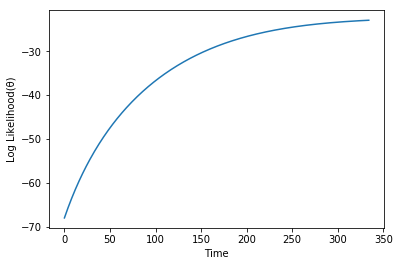

In [21]:
theta_values,llhoodCosts = newtonsMethod(x_values,classes)
print(theta_values)

plt.figure(2)
plt.ylabel('Log Likelihood(%s)'%(u'\u03B8'))
plt.xlabel("Time")
plt.plot(llhoodCosts)
plt.show()

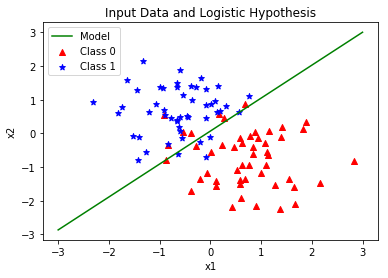

In [11]:
### Calling the Gradient Ascent
no_of_samples = x_values.shape[0]

plt.figure(1)
#Initial Plot   
plt.scatter(x_values[classes[:,0]==1][:,0],x_values[classes[:,0]==1][:,1],c='r',marker='^',label='Class 0')
plt.scatter(x_values[classes[:,0]==0][:,0],x_values[classes[:,0]==0][:,1],c='b',marker='*',label='Class 1')        
theta = theta_values
x_line = np.linspace(-3,3,50)
y_line = -(theta[2,0] +theta[0,0]*x_line)/theta[1,0]

plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x_line,y_line,color='green',label='Model')
plt.legend()
plt.title("Input Data and Logistic Hypothesis")

plt.show()
    
plt.show()

